# Krystian Gronek & Katarzyna Piotrowska
# Text Mining and Social Media Mining, final project - Analyzing men and women comments using NLP methods

# Loading packages and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud,STOPWORDS

# VADER - VALENCE based sentiment analyzer
nltk.download('vader_lexicon');
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer();

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

men = pd.read_csv('data/final_askmen.csv', sep = ';')
women = pd.read_csv('data/final_askwomen.csv', sep = ';')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16171 entries, 0 to 16170
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   username                          16171 non-null  object 
 1   com_original                      16171 non-null  object 
 2   cleaned                           16171 non-null  object 
 3   cleaned_wo_sw                     16171 non-null  object 
 4   tokenized                         16171 non-null  object 
 5   stemmed                           16171 non-null  object 
 6   tokenized_wo_sw                   16171 non-null  object 
 7   submission_title                  16171 non-null  object 
 8   submission_title_cleaned          16171 non-null  object 
 9   submission_title_cleaned_wo_sw    16171 non-null  object 
 10  submission_title_tokenized        16171 non-null  object 
 11  submission_title_stemmed          16171 non-null  object 
 12  subm

# Describing the sentiment analysis problem approach

In this notebook we will try to determine sentiment of words most commonly used by men and women and the differences between the sexes when commenting on Reddit. Because of the existing stereotypes we could hypothesize that women will use positive and supportative language while men will use more rough and vulgar language resulting in higher number of positive comments in women's subreddit comments and higher number of negative comments in men's subreddit. 

In the last jupyter file (3_visualization.ipynb) we split men and women dataset into a categorical variable 'sentiment' that approximates the sentiment of comments based on net value of upvotes and downvotes of that comments ('comment_score') given by other users reading these comments. 

To predict sentiment of the text based on compounded polarity values returned from VADER analyzer, which are between values from -1 to 1, we will assign 'positive' sentiment to those for which the polarity value is greater than 0 and 'negative' sentiment for those that are less than or equal to zero.

The same classification based on polarity scores will be applied to submissions titles but because we do not have the scores just the number of upvotes (as said before users skip downvoting posts, just upvote them if they like the discussion topic) we can't assign *a priori* sentiment of the text used in the submission title. Thus we will only analyze the predicted sentiment of the posts.

# Sentiment analysis - user comments

Below we can see the codes that calculate the polarity score using VADER (Valence Aware Dictionary and Sentiment Reasoner):

In [3]:
### Polarity classification
# Positive >  0
# Negative <= 0

### Calculating male comments sentiment from /r/AskMen
i=0 # counter

men_comments_polarity = list()
men_comments_predicted_sentiment = list()

while (i < len(men)):
    k = analyser.polarity_scores(men.iloc[i]['cleaned'])
    men_comments_polarity.append(k['compound'])
    
    if ((k['compound'] > 0)):
        men_comments_predicted_sentiment.append('positive')
    elif ((k['compound'] <= 0)):
        men_comments_predicted_sentiment.append('negative')
    
    i = i+1

men['comments_polarity'] = men_comments_polarity
men['comments_predicted_sentiment'] = men_comments_predicted_sentiment

### Calculating women comments sentiment from /r/AskWomen
i=0 # counter

women_comments_polarity = list()
women_comments_predicted_sentiment = list()

while (i < len(women)):
    k = analyser.polarity_scores(women.iloc[i]['cleaned'])
    women_comments_polarity.append(k['compound'])
    
    if ((k['compound'] > 0)):
        women_comments_predicted_sentiment.append('positive')
    elif ((k['compound'] <= 0)):
        women_comments_predicted_sentiment.append('negative')
    
    i = i+1

women['comments_polarity'] = women_comments_polarity 
women['comments_predicted_sentiment'] = women_comments_predicted_sentiment

## Results - comments

First let's look at count plots of assigned sentiment based on 'comment_score' and compare it to the predicted sentiment count plots. We can see the plots below. As we can see for men the ratio of negative to positive from data is similar to the ratio in predicted values (ratio of negative to positive dropped slightly from 1.48 to 1.38). For women the ratio of negative to positive comments changed significantly as it changed from 1.62 to 1.19. We could take it as a potential sign that our hypothesis that women tend to use more positive language is correct.

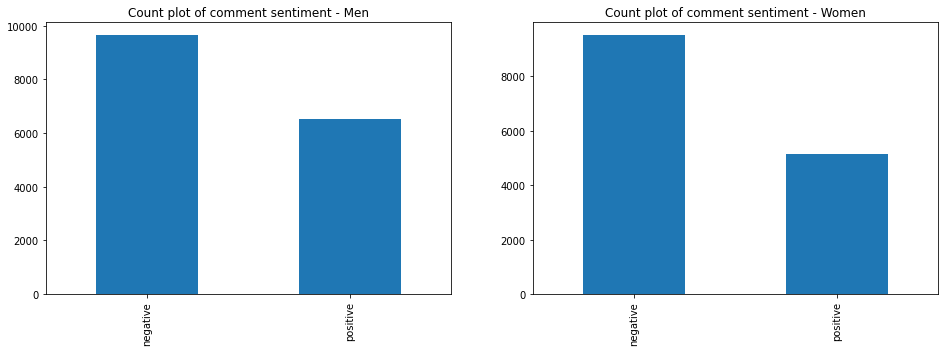

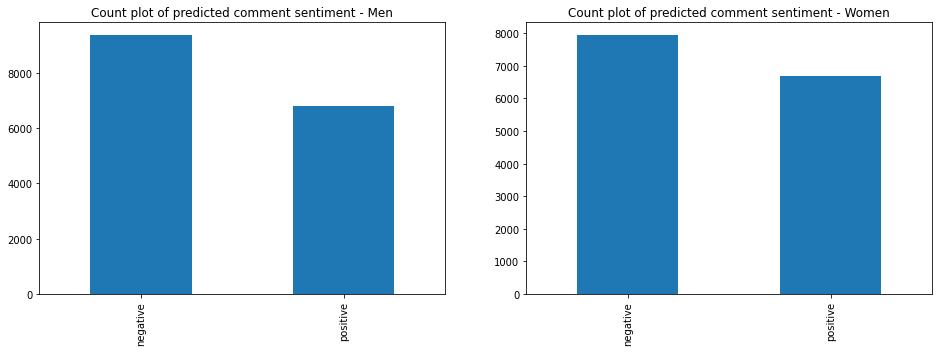

In [4]:
# Dataset sentiment split that we did based on 'comment_score'
fig, ax =plt.subplots(1,2, figsize = (16,5))
men['sentiment'].value_counts().plot(kind='bar', ax = ax[0]).set(title = "Count plot of comment sentiment - Men");
women['sentiment'].value_counts().plot(kind='bar', ax = ax[1]).set(title = "Count plot of comment sentiment - Women");
plt.show();

# Predicted sentiment split based on VADER score
fig, ax =plt.subplots(1,2, figsize = (16,5))
men['comments_predicted_sentiment'].value_counts().plot(kind='bar', ax = ax[0]).set(title = "Count plot of predicted comment sentiment - Men");
women['comments_predicted_sentiment'].value_counts().plot(kind='bar', ax = ax[1]).set(title = "Count plot of predicted comment sentiment - Women");
plt.show();

In [5]:
## Ratio of positive to negative sentiment in comments for men and women
r_neg_pos_men = len(men.loc[men['sentiment'] == 'negative']) / len(men.loc[men['sentiment'] == 'positive'])
r_neg_pos_men_predicted = len(men.loc[men['comments_predicted_sentiment'] == 'negative']) /len(men.loc[men['comments_predicted_sentiment'] == 'positive'])

r_neg_pos_women = len(women.loc[women['sentiment'] == 'negative']) / len(women.loc[men['sentiment'] == 'positive'])
r_neg_pos_women_predicted = len(women.loc[women['comments_predicted_sentiment'] == 'negative']) /len(women.loc[women['comments_predicted_sentiment'] == 'positive'])

print("Ratio of negative to positive sentiment comments:")
print("==========================================================")
print("Data sentiment ratio - men: ", r_neg_pos_men, "\nPredicted sentiment ratio - men: ", r_neg_pos_men_predicted,"\n")
print("Data sentiment ratio - women: ", r_neg_pos_women, "\nPredicted sentiment ratio - women: ", r_neg_pos_women_predicted)

Ratio of negative to positive sentiment comments:
Data sentiment ratio - men:  1.4805951833103237 
Predicted sentiment ratio - men:  1.3749449258334556 

Data sentiment ratio - women:  1.620907230559345 
Predicted sentiment ratio - women:  1.1860812425328555


In [6]:
# /r/AskMen comments sentiment accuracy
men['overestimated'] = np.where((men['sentiment'] == 'negative') & (men['comments_predicted_sentiment'] == 'positive'), 1, 0)
men['underestimated'] = np.where((men['sentiment'] == 'positive') & (men['comments_predicted_sentiment'] == 'negative'), 1, 0)

#checking how many times the predicted sentiment matched the sentiment based on 'comment_score' variable
# men:
men_equal = len(men[men['sentiment'] == men['comments_predicted_sentiment']]) / len(men) # were equal
men_overest = len(men[men['overestimated'] == 1]) / len(men)# overestimated
men_underest = len(men[men['underestimated'] == 1]) / len(men)# underestimated

# Accuracy of our sentiment analysis
print("/r/AskMen comments sentiment analysis prediction accuracy:")
print("==========================================================")
print("Correct predictions - men: ", men_equal*100,"%")
print("Overestimated predictions - men: ", men_overest*100,"%")
print("Underestimated predictions - men: ", men_underest*100,"%")
print("\n")

# /r/AskWen comments sentiment accuracy
women['overestimated'] = np.where((women['sentiment'] == 'negative') & (women['comments_predicted_sentiment'] == 'positive'), 1, 0)
women['underestimated'] = np.where((women['sentiment'] == 'positive') & (women['comments_predicted_sentiment'] == 'negative'), 1, 0)

#checking how many times the predicted sentiment matched the sentiment based on 'comment_score' variable
# men:
women_equal = len(women[women['sentiment'] == women['comments_predicted_sentiment']]) / len(women) # were equal
women_overest = len(women[women['overestimated'] == 1]) / len(women)# overestimated
women_underest = len(women[women['underestimated'] == 1]) / len(women)# underestimated

# Accuracy of our sentiment analysis
print("/r/AskWomen comments sentiment analysis prediction accuracy:")
print("============================================================")
print("Correct predictions - women: ", women_equal*100,"%")
print("Overestimated predictions - women: ", women_overest*100,"%")
print("Underestimated predictions - women: ", women_underest*100,"%")

/r/AskMen comments sentiment analysis prediction accuracy:
Correct predictions - men:  53.12596623585431 %
Overestimated predictions - men:  24.333683754869828 %
Underestimated predictions - men:  22.540350009275866 %


/r/AskWomen comments sentiment analysis prediction accuracy:
Correct predictions - women:  53.34745183768275 %
Overestimated predictions - women:  28.665118185544475 %
Underestimated predictions - women:  17.987429976772784 %


In [7]:
(women_overest - women_underest ) * 100

10.677688208771691

Looking at the accuracy of the prediction based on data we can see that for men 53.13 % of the comments were predicted correctly, 24.33% were overestimated (positive sentiment predicted for negative sentiment assigned comment) and 22.54 % were underestimated (negative sentiment predicted for positive sentiment assigned comment). For women 53.34% of the comments were predicted correctly, 28.67% were overestimated and 17.99 % were underestimated.

These predictions are of course only relative to our variable 'comment_score' which as we said before is just a rudimentary approximation of the sentiment from user upvotes. Similarity of our ratios can also be attributed to the balance of our overestimated and underestimated values from data. For men the number of overestimated predictions were almost equal to the underestimated prediction which is the reason the predicted count plot is similar to the data one. 

In case of women predictions it's also the reason that the prediction moved the ratio in favour of positive comments. The net change of the negative to positve sentiment of the comments is equal to 10.68 %. It is a significant chunk of observations and we could say that it means that the language that women use may be more positive that their comment score would predict. 

## Wordclouds in respect to predicted sentiment

/r/AskMen Wordcloud plot - positive sentiment words


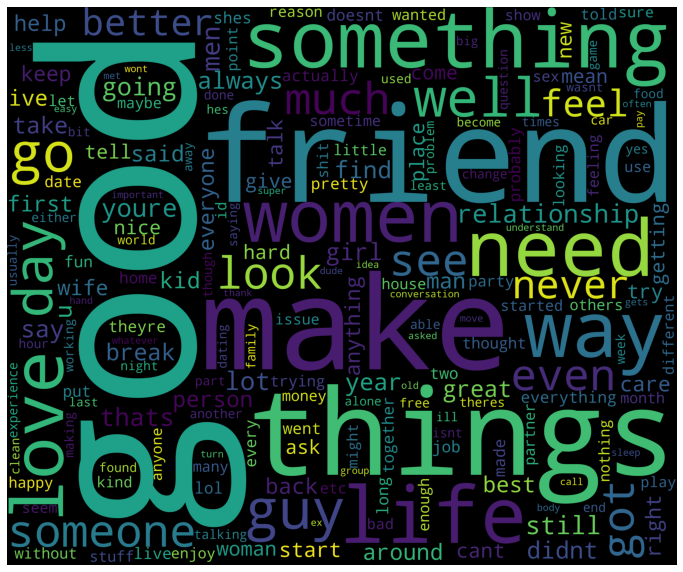

/r/AskWomen Wordcloud plot - positive sentiment words


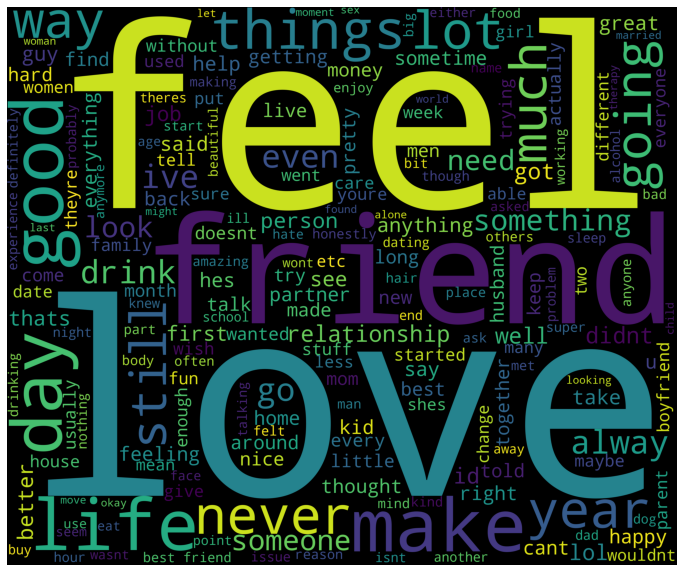

In [8]:
# Men word cloud - comments
cleaned_words_men_positive = ' '.join(men['cleaned_wo_sw'].loc[men['comments_predicted_sentiment'] == 'positive'])
cleaned_words_men_negative = ' '.join(men['cleaned_wo_sw'].loc[men['comments_predicted_sentiment'] == 'negative'])

# Women word cloud - comments
cleaned_words_women_positive = ' '.join(women['cleaned_wo_sw'].loc[women['comments_predicted_sentiment'] == 'positive'])
cleaned_words_women_negative = ' '.join(women['cleaned_wo_sw'].loc[women['comments_predicted_sentiment'] == 'negative'])

# Shared stopword list that are too common for both women and men 
stopwords = set(STOPWORDS)
stopwords.add("one")
stopwords.add("im")
stopwords.add("time")
stopwords.add("dont")
stopwords.add("people")
stopwords.add("thing")
stopwords.add("work")
stopwords.add("want")
stopwords.add("think")
stopwords.add("know")
stopwords.add("really")

## Positive wordclouds
# Men word cloud - comments
wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men_positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot - positive sentiment words")
plt.show();

# Women word cloud - comments
wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women_positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot - positive sentiment words")
plt.show();

/r/AskMen Wordcloud plot - negative sentiment words


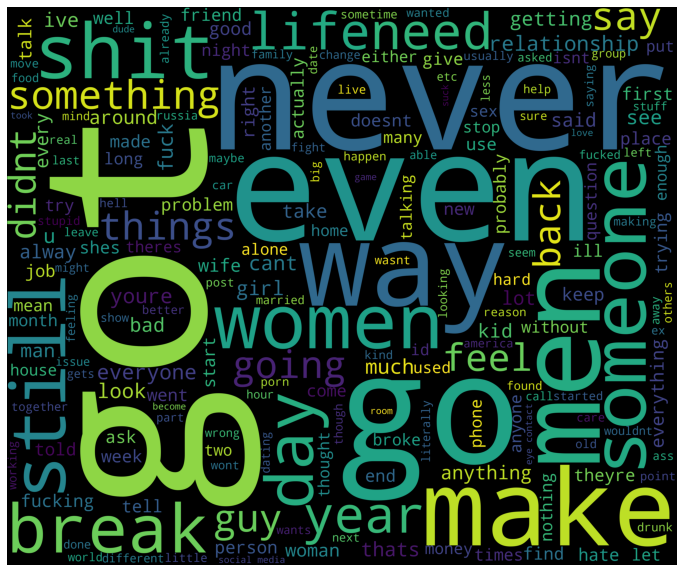

/r/AskWomen Wordcloud plot - negative sentiment words


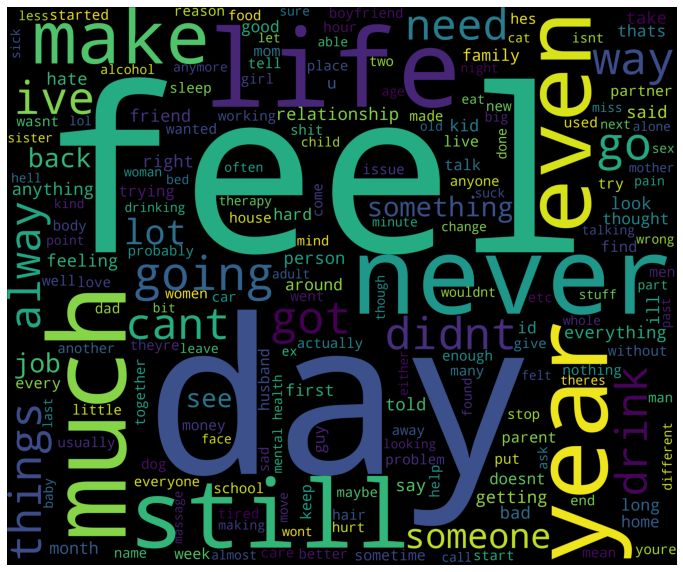

In [9]:
## Negative wordclouds
# Men word cloud - comments
wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men_negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot - negative sentiment words")
plt.show();

# Women word cloud - comments
wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women_negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot - negative sentiment words")
plt.show();



<b>Comments to the predicted positive word clouds:

When looking at cloud of words coming from positive comments we can see that for /r/AskMen comments were mostly using words like: "make", "friend", "good", "things", while for /r/AskWomen the most commonly used words were "friend", "love", "feel". 


<b>Comments to the predicted negative word clouds:

When looking at cloud of words coming from positive comments we can see that for /r/AskMen comments were mostly using words like: "go", "even", "got", "never", "women", "men", "make", "day", "way", "break" while for /r/AskWomen the most commonly used words were "feel", "day", "never", "still", "much", "life", "even", "year", "make".


# Sentiment analysis - submission posts titles

The comments for analysis of posts will be at the bottom of this subsection.
Below we can see the codes that calculate the polarity score of posts:

In [10]:
# Deleting entries that duplicates of post titles 
posts_men = men.drop_duplicates(subset = ['submission_title'], keep = 'first')
posts_men = posts_men.reset_index()
posts_women = women.drop_duplicates(subset = ['submission_title'], keep = 'first')
posts_women = posts_women.reset_index()

### Submission titles from /r/AskMen
i=0 # counter

men_posts_polarity = list()
men_posts_predicted_sentiment = list()

while (i < len(posts_men)):
    k = analyser.polarity_scores(posts_men['submission_title_cleaned'].iloc[i])
    men_posts_polarity.append(k['compound'])
    
    if ((k['compound'] > 0)):
        men_posts_predicted_sentiment.append('positive')
    elif ((k['compound'] <= 0)):
        men_posts_predicted_sentiment.append('negative')
    
    i = i+1
    
posts_men['posts_polarity'] = men_posts_polarity 
posts_men['posts_predicted_sentiment'] = men_posts_predicted_sentiment
### Submission titles from /r/AskWomen
i=0 # counter

women_posts_polarity = list()
women_posts_predicted_sentiment = list()

while (i < len(posts_women)):
    k = analyser.polarity_scores(posts_women['submission_title_cleaned'].loc[i])
    women_posts_polarity.append(k['compound'])
    
    if ((k['compound'] > 0)):
        women_posts_predicted_sentiment.append('positive')
    elif ((k['compound'] <= 0)):
        women_posts_predicted_sentiment.append('negative')

    i = i+1

posts_women['posts_polarity'] = women_posts_polarity
posts_women['posts_predicted_sentiment'] = women_posts_predicted_sentiment

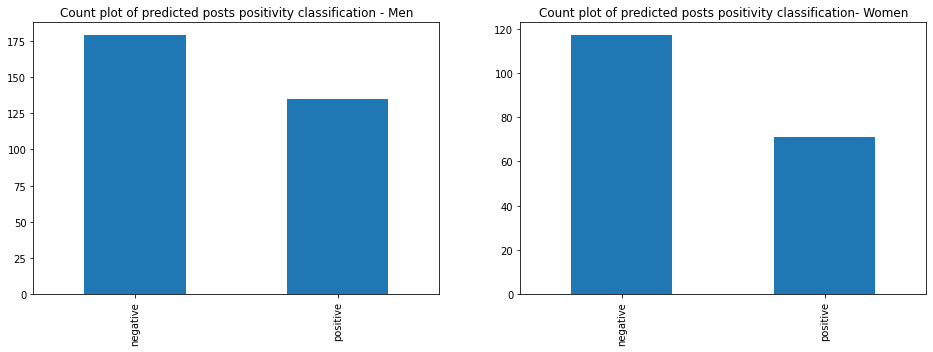

In [11]:
# Predicted posts sentiment based on VADER score
fig, ax =plt.subplots(1,2, figsize = (16,5))
posts_men['posts_predicted_sentiment'].value_counts().plot(kind='bar', ax = ax[0]).set(title = "Count plot of predicted posts positivity classification - Men");
posts_women['posts_predicted_sentiment'].value_counts().plot(kind='bar', ax = ax[1]).set(title = "Count plot of predicted posts positivity classification- Women");
plt.show();

In [12]:
## Ratio of positive to negative sentiment in comments for men and women
r_neg_pos_men_predicted = len(posts_men.loc[posts_men['posts_predicted_sentiment'] == 'negative']) /len(posts_men.loc[posts_men['posts_predicted_sentiment'] == 'positive'])
r_neg_pos_women_predicted = len(posts_women.loc[posts_women['posts_predicted_sentiment'] == 'negative']) /len(posts_women.loc[posts_women['posts_predicted_sentiment'] == 'positive'])

print("Ratio of negative to positive sentiment posts:")
print("==========================================================")
print("Predicted sentiment ratio - men: ", r_neg_pos_men_predicted,"\n")
print("Predicted sentiment ratio - women: ", r_neg_pos_women_predicted)

Ratio of negative to positive sentiment posts:
Predicted sentiment ratio - men:  1.325925925925926 

Predicted sentiment ratio - women:  1.647887323943662


/r/AskMen Wordcloud plot - positive sentiment words


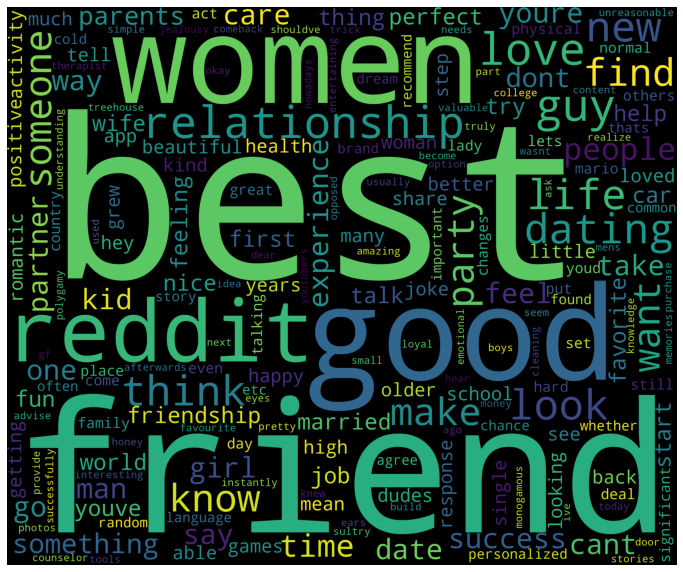

/r/AskWomen Wordcloud plot - positive sentiment words


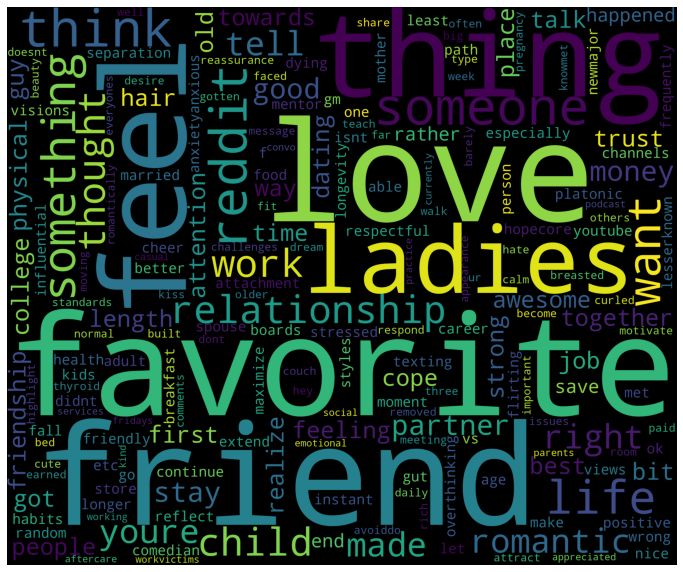

In [13]:
# /r/AskMen word cloud - posts
cleaned_words_men_positive = ' '.join(posts_men['submission_title_cleaned_wo_sw'].loc[posts_men['posts_predicted_sentiment'] == 'positive'])
cleaned_words_men_negative = ' '.join(posts_men['submission_title_cleaned_wo_sw'].loc[posts_men['posts_predicted_sentiment'] == 'negative'])

# /r/AskWomen word cloud - posts
cleaned_words_women_positive = ' '.join(posts_women['submission_title_cleaned_wo_sw'].loc[posts_women['posts_predicted_sentiment'] == 'positive'])
cleaned_words_women_negative = ' '.join(posts_women['submission_title_cleaned_wo_sw'].loc[posts_women['posts_predicted_sentiment'] == 'negative'])

# Shared stopword list that are too common for both women and men 
# Add sex names to the stopwords and their synonyms from their respective subreddits 
# (men from /r/AskMen and women from /r/AskWomen)
# because people use them to ask their respective userbase
stopwords_men= set(STOPWORDS)
stopwords_women= set(STOPWORDS)
stopwords_men.add("men")
stopwords_women.add("women")
stopwords_men.add("whats")
stopwords_women.add("whats")

# stopwords.add("one")
# stopwords.add("im")
# stopwords.add("time")
# stopwords.add("dont")
# stopwords.add("people")
# stopwords.add("thing")
# stopwords.add("work")
# stopwords.add("want")
# stopwords.add("think")
# stopwords.add("know")
# stopwords.add("really")
# 
## Positive wordclouds
# Men word cloud - posts
wordcloud_men = WordCloud(stopwords=stopwords_men,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men_positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot - positive sentiment words")
plt.show();

# Women word cloud - posts# 
wordcloud_women = WordCloud(stopwords=stopwords_women,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women_positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot - positive sentiment words")
plt.show();

/r/AskMen Wordcloud plot - negative sentiment words


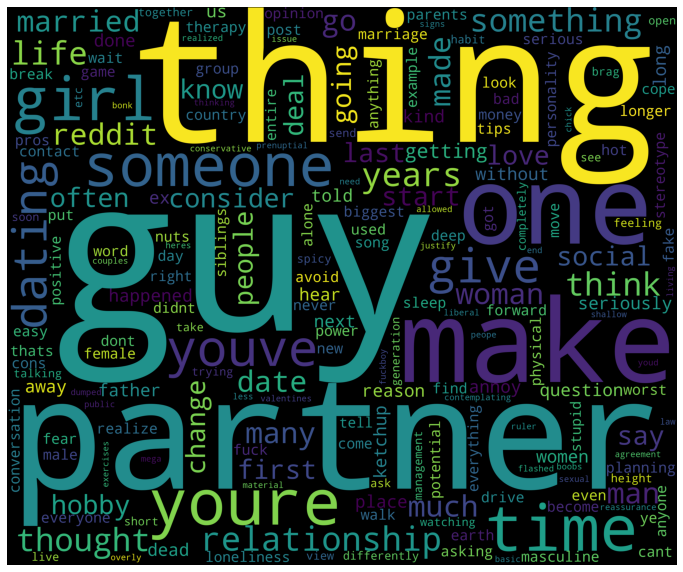

/r/AskWomen Wordcloud plot - negative sentiment words


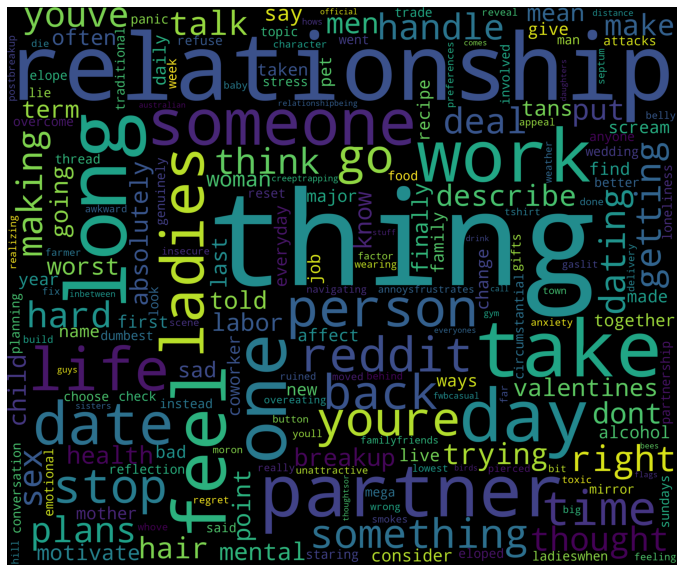

In [14]:
## Negative wordclouds
# Men word cloud - posts
wordcloud_men = WordCloud(stopwords=stopwords_men,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men_negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot - negative sentiment words")
plt.show();

# Women word cloud - posts# 
wordcloud_women = WordCloud(stopwords=stopwords_women,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women_negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot - negative sentiment words")
plt.show();

## Comments to the posts sentiment analysis

Perhaps more interesting are the topics of the discussion in women and men subreddits. For positive sentiment posts we can see words such as "best", "friend", "good", "women" or "relationship" for /r/AskMen and words like "friend", "love", "thing", "ladies", "feel". We can see a pattern here comparing most commonly used words in women and men subreddits that women do not write about men or women but rather use words regarding love and feelings while men tend to focus a lot on women and friends.

For most commomly used words in posts titles with negative sentiment we can see that /r/AskMen users tend to use "guy", "partner", "think", "make", "girl" or "one" the most. /r/AskWomen users use "relationship", "thing" and "partner" the most.

# Conclusions

We carried out an sentiment analysis of the comments and posts with respect to subreddits /r/AskMen and /r/AskWomen. For the predicted results of comments they were pretty similar to the 'comments_score' determined sentiment in case of men and women. For women the relative number of negative to positive comments were smaller meaning that they were using slightly more positive language than their score would suggest. Overall the ratio of negative to positive comments were bigger than 1 for both predicted and 'comment_score' determined sentiment for both sexes. That could suggest that both sexes are pretty negative in the web when writing comments. 

For posts titles we could not determine the sentiment prediction matching to the score because of the lack of data but we can see that relatively post titles ratio of negative to positive sentiment were smaller for /r/AskMen and bigger for /r/AskWomen. 

Because we can't assume that the questions asked in form of posts titles were made by specific sex we can't draw conclusion whether men or women are more positive in term of asking questions on /r/AskWomen and /r/AskMen. We could theoretize that because we could assume the sex for comments replies and women reply comments are more relatively less negative compared to men, that because the dependance for posts is inverse not that the questions asked in /r/AskMen are made mostly by women while in /r/AskWomen mostly by men.

# Saving datasets 
### (with VADER polarity values and predicted sentiment based on them)

In [15]:
#men.to_csv('./data/final_askmen.csv', sep = ';', encoding = "utf-8", index = None, header = True)
#women.to_csv('./data/final_askwomen.csv', sep = ';', encoding = "utf-8", index = None, header = True)